In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [18]:
def get_lower_and_upper_bounds(Series, multiplier = 1.5):
    q1 = Series.quantile(.25)
    q3 = Series.quantile(.75)
    iqr = q3 - q1
    upper = q3 + (iqr*multiplier)
    lower = q1 - (iqr*multiplier)
    return lower, upper

Using lemonade.csv dataset and focusing on continuous variables:

1) Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [3]:
lemon = pd.read_csv('https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv')

In [5]:
lemon.head(3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15


In [21]:
lemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [16]:
lemon.iloc[:,2:]

,Temperature,Rainfall,Flyers,Price,Sales
0,27.0,2.00,15,0.5,10
1,28.9,1.33,15,0.5,13
2,34.5,1.33,27,0.5,15
3,44.1,1.05,28,0.5,17
4,42.4,1.00,33,0.5,18
...,...,...,...,...,...
360,42.7,1.00,33,0.5,19
361,37.8,1.25,32,0.5,16
362,39.5,1.25,17,0.5,15
363,30.9,1.43,22,0.5,13


In [20]:
for col in lemon.iloc[:,2:]:
    lower, upper = get_lower_and_upper_bounds(lemon[col], 1.5)
    print(f'Ranges for {col}')
    print()
    print(f'Lower: {lower}')
    print(f'Upper: {upper}')
    print('-----------------')

Ranges for Temperature

Lower: 16.700000000000003
Upper: 104.7
-----------------
Ranges for Rainfall

Lower: 0.26
Upper: 1.3
-----------------
Ranges for Flyers

Lower: 4.0
Upper: 76.0
-----------------
Ranges for Price

Lower: 0.5
Upper: 0.5
-----------------
Ranges for Sales

Lower: 5.0
Upper: 45.0
-----------------


**Temperature**: In this day and age of climate change, I wouldn't even know where to begin to determine what would be appropriate bounds for temperature.

**Rainfall**: Yes, these bounds look reasonable to me, assuming the unit is inches.

**Flyers**: Yes, if this is amount of flyers posted (and it means it's targeting effectiveness of advertising).

**Price**: Doesn't seem like price changed, so yes, it's reasonable bounds.

**Sales**: If price of lemonade is only $0.50, then yes, these numbers are reasonable.

2) Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

In [24]:
# For Temperature

lemon[lemon.Temperature > 104.7]

# Yes, this makes sense, because 212 is the boiling point of water. That should raise a red flag.

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


In [30]:
# For Rainfall

lemon[lemon.Rainfall > 1.3]

# There's nothing that seems to be overly suspicious apart from the values 2.00 and 2.50. I think the IQR*1.5 might
# not catch the fact that there's seasonality in rainy seasons.

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12
11,1/12/17,Thursday,38.2,1.33,16,0.5,14
12,1/13/17,Friday,37.5,1.33,19,0.5,15
15,1/16/17,Monday,30.6,1.67,24,0.5,12
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14


In [26]:
# For Flyers

lemon[lemon.Flyers > 76]

# As I'm not familiar with what's normal for flyers, I can't say for certain.

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
166,6/16/17,Friday,99.3,0.47,77,0.5,41
194,7/14/17,Friday,92.0,0.50,80,0.5,40


In [27]:
# For Price

lemon[lemon.Price > .5]

# There are no outliers, since the price of lemonade never changed.

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [31]:
# For Sales

lemon[lemon.Sales > 45]

# Yes, hundreds of dollars does seem to be odd if the price of lemonade is only 0.5, and it's a lemonade stand.

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


3) Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

In [32]:
for col in lemon.iloc[:,2:]:
    lower, upper = get_lower_and_upper_bounds(lemon[col], 3.0)
    print(f'Ranges for {col}')
    print()
    print(f'Lower: {lower}')
    print(f'Upper: {upper}')
    print('-----------------')

Ranges for Temperature

Lower: -16.299999999999997
Upper: 137.7
-----------------
Ranges for Rainfall

Lower: -0.13
Upper: 1.69
-----------------
Ranges for Flyers

Lower: -23.0
Upper: 103.0
-----------------
Ranges for Price

Lower: 0.5
Upper: 0.5
-----------------
Ranges for Sales

Lower: -10.0
Upper: 60.0
-----------------


In [36]:
for col in lemon.iloc[:,2:]:
    print(lemon[lemon[col] < lemon[col].quantile(.25) - ((lemon[col].quantile(.75) - lemon[col].quantile(.25))*3)])

Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
         Date      Day  Temperature  Rainfall  Flyers  Price  Sales
324  11/21/17  Tuesday         47.0      0.95     -38    0.5     20
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []


4) Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [40]:
for col in lemon.iloc[:,2:]:
    lower, upper = get_lower_and_upper_bounds(lemon[col], 3)
    print(lemon[col][lemon[col] > upper])
    print()
    print('---------------')
    print()

41    212.0
Name: Temperature, dtype: float64

---------------

0      2.00
338    1.82
343    1.82
364    2.50
Name: Rainfall, dtype: float64

---------------

Series([], Name: Flyers, dtype: int64)

---------------

Series([], Name: Price, dtype: float64)

---------------

181    143
182    158
183    235
184    534
Name: Sales, dtype: int64

---------------



> For Temperature, that outlier should definitely be removed.

> For Rainfall, I don't believe any of those should be removed. Two inches of rain does not seem like it's terribly unreasonable.

> For Sales, yes, maybe anything higher than 200 should be removed. Regardless, 143 and 158 should be looked at more closely.

Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

1) Use a 2 sigma decision rule to isolate the outliers.

 - Do these make sense?

 - Should certain outliers be kept or removed?

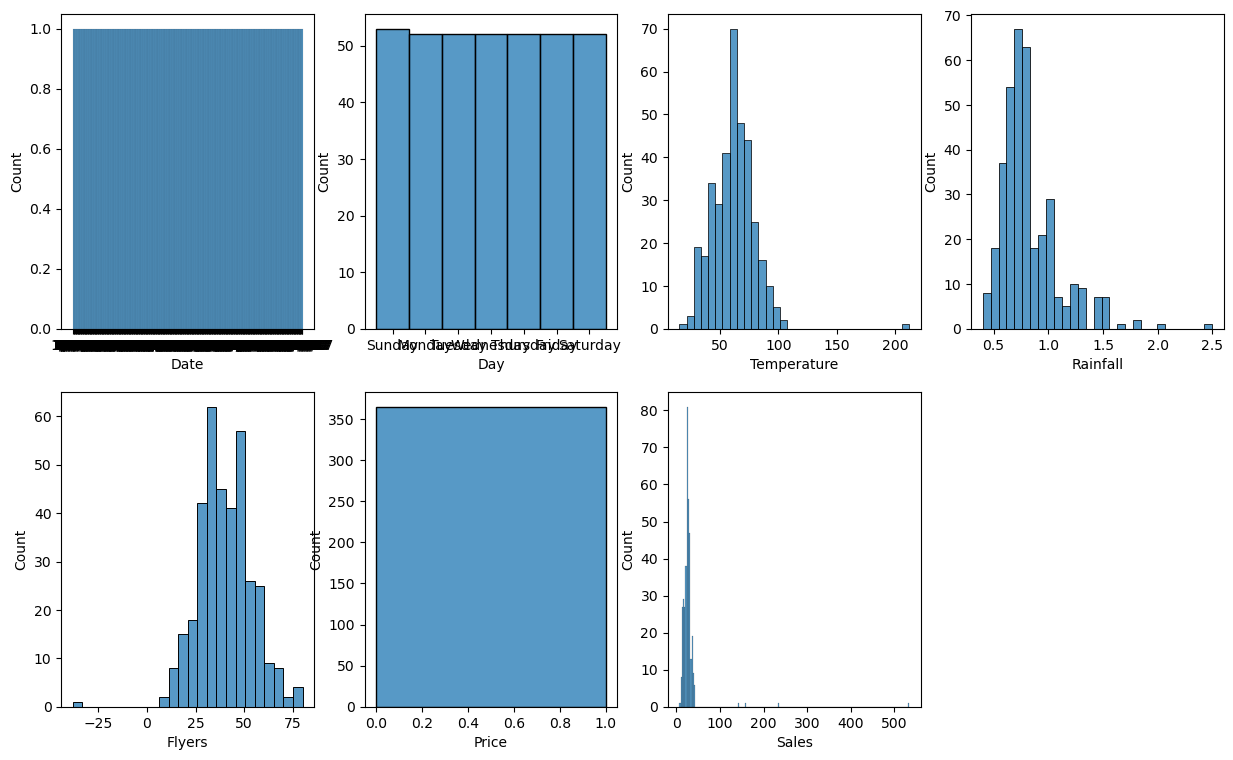

In [44]:
#Identifying normally distributed columns

plt.figure(figsize=(15,9))

for i, col in enumerate(lemon):
    plt.subplot(2,4,(i+1))
    sns.histplot(lemon[col])

plt.show()

> We'll remove Date, Day, and Price for exploration.

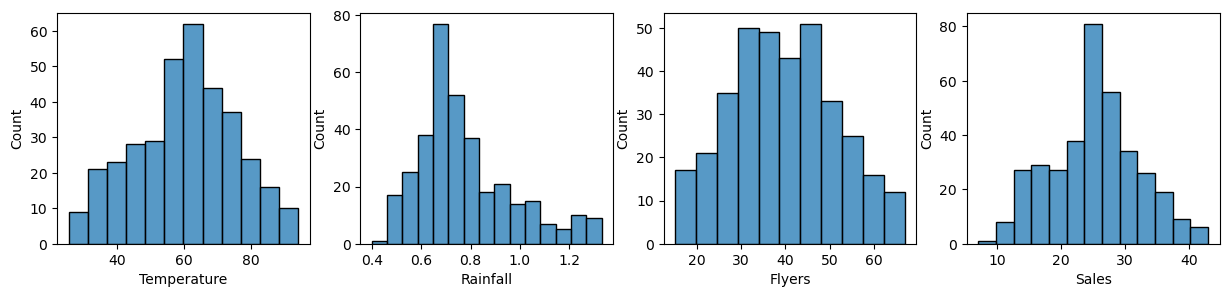

In [55]:
plt.figure(figsize=(15,3))

for i, col in enumerate(lemon[['Temperature', 'Rainfall', 'Flyers', 'Sales']]):
    plt.subplot(1,4,(i+1))
    sns.histplot(lemon[col][((lemon[col] > (lemon[col].mean() - (2 * lemon[col].std())))) & \ #Using two times the std
                           ((lemon[col] < (lemon[col].mean() + (2 * lemon[col].std()))))])

plt.show()

> This looks rather normal and significantly more "appropriate" of a dataset than the initial, non-filtered histograms.

In [60]:
#Doing a check and isolating all outliers per column.

for col in lemon[['Temperature', 'Rainfall', 'Flyers', 'Sales']]:
    print(f'Outliers found in {[col]}:')
    print(lemon[col][((lemon[col] < (lemon[col].mean() - (2 * lemon[col].std())))) | 
                           ((lemon[col] > (lemon[col].mean() + (2 * lemon[col].std()))))])
    print()
    print('----------')

Outliers found in ['Temperature']:
41     212.0
166     99.3
176    102.6
181    102.9
190     98.0
198     99.3
202     99.6
207     97.9
338     22.0
364     15.1
Name: Temperature, dtype: float64

----------
Outliers found in ['Rainfall']:
0      2.00
5      1.54
6      1.54
10     1.54
15     1.67
16     1.43
19     1.43
23     1.54
337    1.54
338    1.82
342    1.43
343    1.82
346    1.43
347    1.54
351    1.43
355    1.54
359    1.43
363    1.43
364    2.50
Name: Rainfall, dtype: float64

----------
Outliers found in ['Flyers']:
166    77
170    70
171    76
182    68
183    68
194    80
198    76
203    72
204    69
207    74
324   -38
338    11
364     9
Name: Flyers, dtype: int64

----------
Outliers found in ['Sales']:
181    143
182    158
183    235
184    534
Name: Sales, dtype: int64

----------


> I definitely think too many outliers are being included when just using the 2-$\sigma$ rule.

2) Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

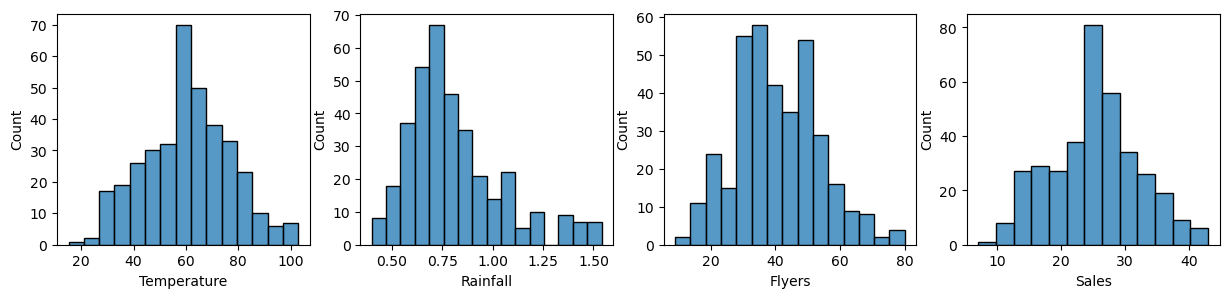

In [56]:
plt.figure(figsize=(15,3))

for i, col in enumerate(lemon[['Temperature', 'Rainfall', 'Flyers', 'Sales']]):
    plt.subplot(1,4,(i+1))
    sns.histplot(lemon[col][((lemon[col] > (lemon[col].mean() - (3 * lemon[col].std())))) & \
                           ((lemon[col] < (lemon[col].mean() + (3 * lemon[col].std()))))])

plt.show()

> Along the same lines, *visually*, these also look rather all right in comparison with the initial histograms. Rainfall is starting to look a little skewed, but I would still move forward with running stats tests on that column.

In [61]:
for col in lemon[['Temperature', 'Rainfall', 'Flyers', 'Sales']]:
    print(f'Outliers found in {[col]}:')
    print(lemon[col][((lemon[col] < (lemon[col].mean() - (3 * lemon[col].std())))) | 
                           ((lemon[col] > (lemon[col].mean() + (3 * lemon[col].std()))))])
    print()
    print('----------')

Outliers found in ['Temperature']:
41    212.0
Name: Temperature, dtype: float64

----------
Outliers found in ['Rainfall']:
0      2.00
15     1.67
338    1.82
343    1.82
364    2.50
Name: Rainfall, dtype: float64

----------
Outliers found in ['Flyers']:
324   -38
Name: Flyers, dtype: int64

----------
Outliers found in ['Sales']:
181    143
182    158
183    235
184    534
Name: Sales, dtype: int64

----------


> I think these outliers make much more sense, though I struggle to think that any outliers should be included in the Rainfall column.